# Assignment - 25 - MACHINE LEARNING - 6
## By Prakash Ghosh
---

### Problem Statement: 
### Predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.
---

#### The description of the dataset:

<b>Data Set Information: </b>

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions:<br> ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
* \>50K, <=50K.
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
* Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,Holand-Netherlands.

In [ ]:
# Loading Data and modules
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.metrics import precision_score, recall_score , f1_score

import xgboost as xgb
from xgboost import plot_tree , plot_importance 
from xgboost.sklearn import XGBClassifier

import matplotlib.pyplot as plt

In [2]:
# Create DataFrame from URL
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
train_set.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
test_set.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [4]:
col_labels = ['age', 
              'workclass', 
              'fnlwgt', 
              'education', 
              'education_num', 
              'marital_status',
              'occupation',
              'relationship', 
              'race', 
              'sex', 
              'capital_gain', 
              'capital_loss', 
              'hours_per_week',
              'native_country', 
              'wage_class']

# Rename the column using the list col_labels
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
train_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Solution:
---

* Data Preapration 

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# test dataset details
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [9]:
# Both Train and Test Dataset has ' ?', we will remove these record
df_train = train_set.replace(' ?', np.nan).dropna()
df_test= test_set.replace(' ?', np.nan).dropna()

# In the Test Set there is a extra . in wage class. We will romove the . from the data
df_test['wage_class'] = df_test.wage_class.replace({' <=50K.': '<=50K', ' >50K.':'>50K'})
df_test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
# Remove duplicate records
df_train=df_train.drop_duplicates(keep='first')
df_test=df_test.drop_duplicates(keep='first')

In [12]:
# Convert categorical coulumns into numerical
for col in df_train.columns:
    if df_train[col].dtype == 'object': 
        df_train[col] = pd.Categorical(df_train[col]).codes 

for col in df_test.columns:
    if df_test[col].dtype == 'object': 
        df_test[col] = pd.Categorical(df_test[col]).codes 

In [13]:
df_train.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0


In [14]:
df_test.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
age               30139 non-null int64
workclass         30139 non-null int8
fnlwgt            30139 non-null int64
education         30139 non-null int8
education_num     30139 non-null int64
marital_status    30139 non-null int8
occupation        30139 non-null int8
relationship      30139 non-null int8
race              30139 non-null int8
sex               30139 non-null int8
capital_gain      30139 non-null int64
capital_loss      30139 non-null int64
hours_per_week    30139 non-null int64
native_country    30139 non-null int8
wage_class        30139 non-null int8
dtypes: int64(6), int8(9)
memory usage: 1.9 MB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15055 entries, 0 to 16280
Data columns (total 15 columns):
age               15055 non-null int64
workclass         15055 non-null int8
fnlwgt            15055 non-null int64
education         15055 non-null int8
education_num     15055 non-null int64
marital_status    15055 non-null int8
occupation        15055 non-null int8
relationship      15055 non-null int8
race              15055 non-null int8
sex               15055 non-null int8
capital_gain      15055 non-null int64
capital_loss      15055 non-null int64
hours_per_week    15055 non-null int64
native_country    15055 non-null int8
wage_class        15055 non-null int8
dtypes: int64(6), int8(9)
memory usage: 955.6 KB


In [17]:
# Stattistical Analysis of train dataset
df_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,30139.000000,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,2.199409,1.897950e+05,10.333057,10.122532,2.579714,5.960317,1.418494,3.678523,0.675736,1092.841202,88.439928,40.934703,36.384784,0.249046
std,13.131426,0.954217,1.056586e+05,3.812057,2.548738,1.498082,4.030067,1.601630,0.834786,0.468107,7409.110596,404.445239,11.978753,6.102941,0.432468
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176275e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784170e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376045e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [18]:
# Stattistical Analysis of test dataset
df_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,15055.000000,15055.000000,1.505500e+04,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000,15055.000000
mean,38.772036,2.214879,1.896234e+05,10.273331,10.112255,2.595218,5.989572,1.401461,3.683560,0.673730,1120.673663,89.071471,40.954234,35.467087,0.245766
std,13.380850,0.966555,1.056081e+05,3.826205,2.558759,1.505299,4.020303,1.589113,0.827747,0.468863,7704.433932,406.347469,12.062092,5.881832,0.430554
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.166570e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,1.779550e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,2.385895e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


* <b> Basline Line accuracy for wage_class 

In [19]:
print('Basline Line accuracy for train dataset:')
df_train['wage_class'].value_counts(normalize=True)

Basline Line accuracy for train dataset:


0    0.750954
1    0.249046
Name: wage_class, dtype: float64

In [20]:
print('Basline Line accuracy for test dataset:')
df_test['wage_class'].value_counts(normalize=True)

Basline Line accuracy for test dataset:


0    0.754234
1    0.245766
Name: wage_class, dtype: float64

<b>Observation-1: 
In both training and test dataset approx. 75% people have salary in '<=50K' category

#### Data Visualization:
---

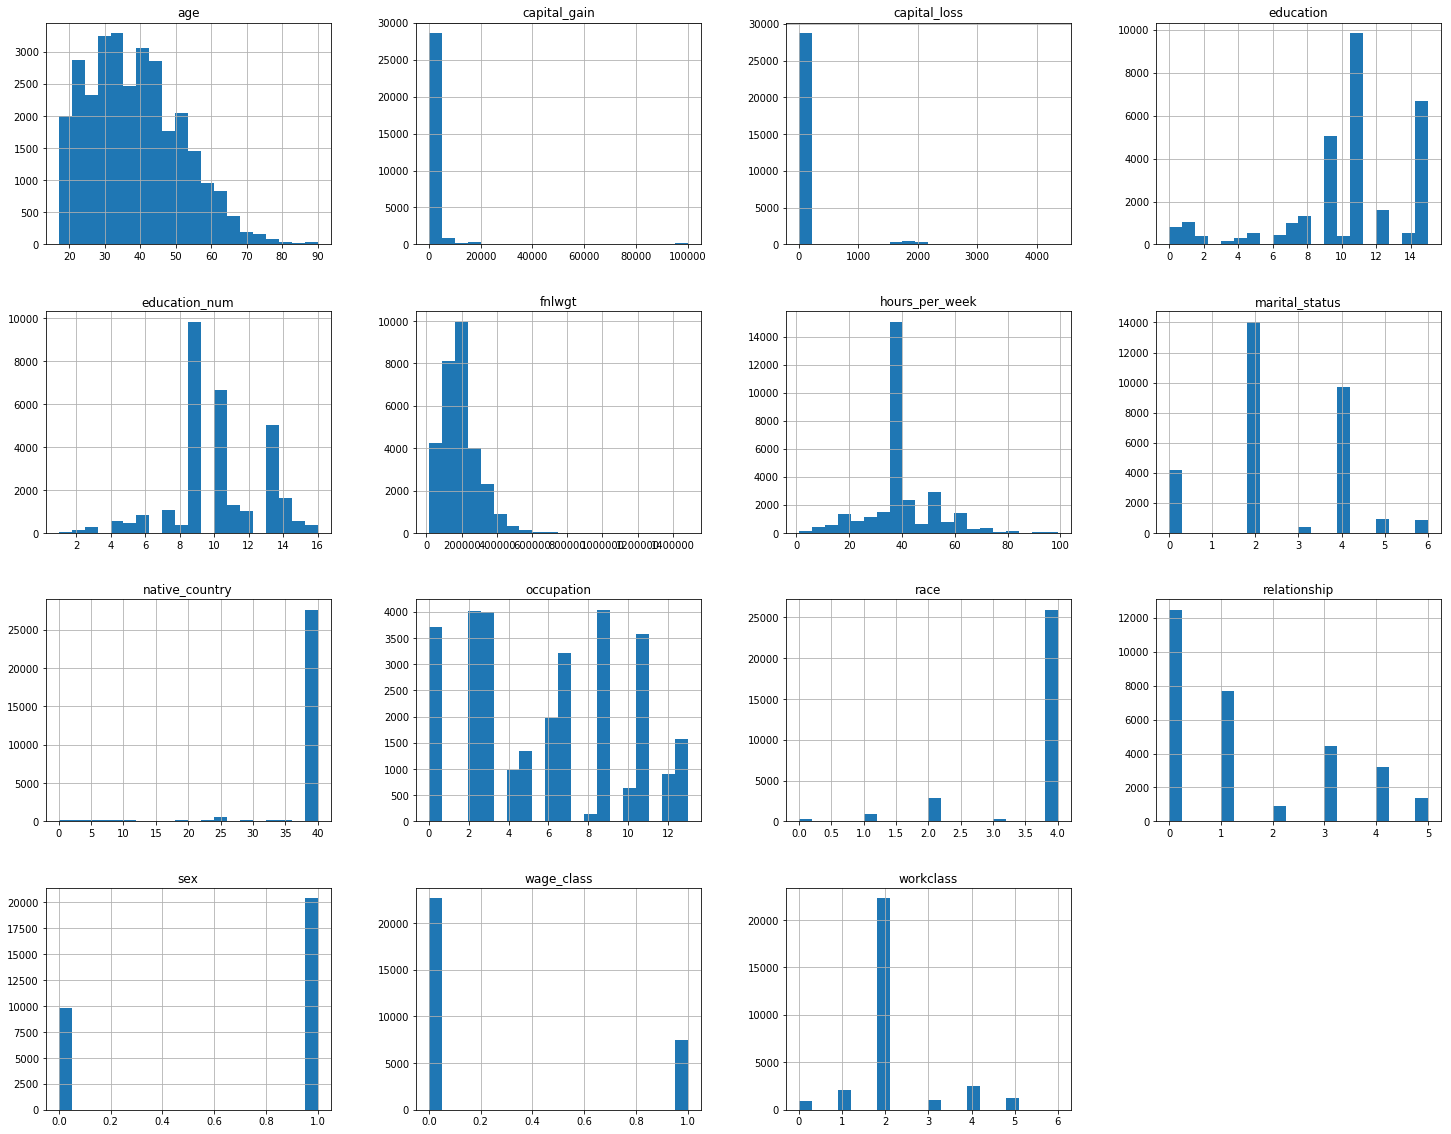

In [21]:
# Data Visualisation for Train Dataset
df_train.hist(bins=20, figsize=(25,20))
plt.show()

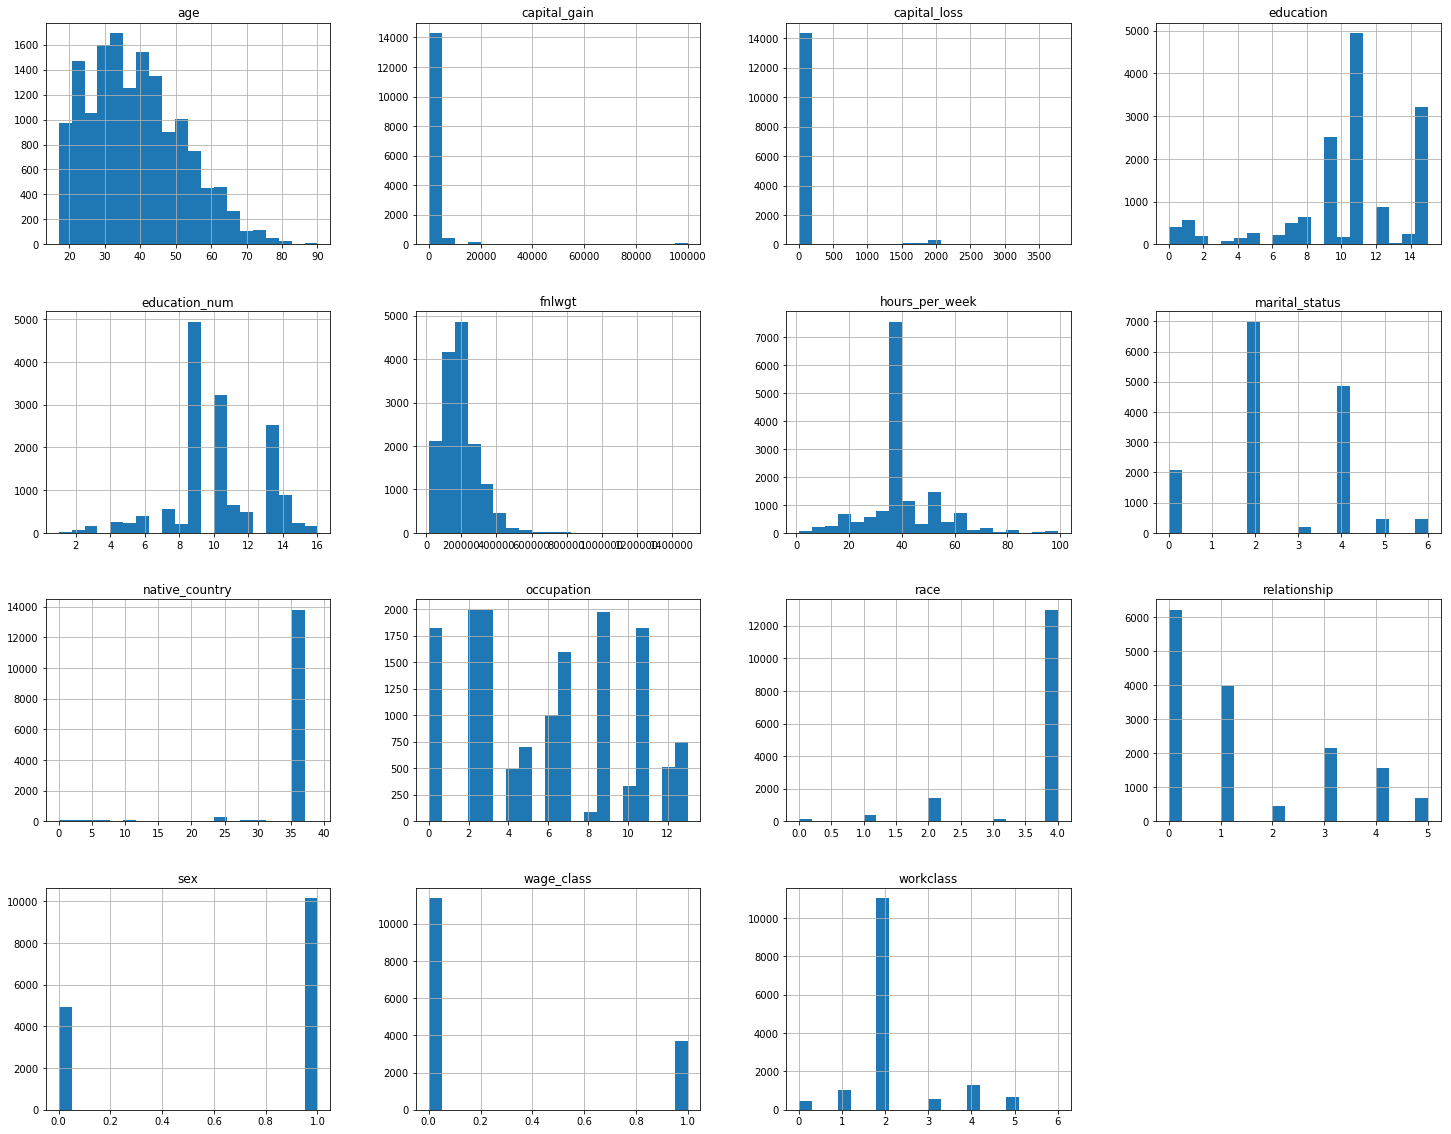

In [22]:
# Data Visualisation for Test Dataset
df_test.hist(bins=20, figsize=(25,20))
plt.show()

### XGboost Model - Preparation

In [23]:
# Create Target and Feature variable from Training and Test datatset
X_train =df_train.iloc[:,:-1]    
y_train = df_train.iloc[:,-1:]    

X_test =df_test.iloc[:,:-1]    
y_test = df_test.iloc[:,-1:] 

In [75]:
# Define parameter for XGBoost Model
params = {'objective':'binary:logistic' , 'max_depth':5, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':500,  'random_state':1 ,'subsample':0.6,'gamma':0.90 , 'n_jobs':10}

In [76]:
# Apply XGBoost Model
XGB_model_clf= XGBClassifier(**params)
xgb_model =XGB_model_clf.fit(X=X_train, y=np.ravel(y_train))

### XGboost Model - Evaluation

In [77]:
# Predict probabilities and values 
y_pred=xgb_model.predict(X_train)
y_pred_prob=xgb_model.predict_proba(X_train)

# Confusion Matrix 
matrix = confusion_matrix(y_true=y_train , y_pred=y_pred)

# Classification Report 
report = classification_report(y_true=y_train , y_pred=y_pred)

print("Confusion Matrix for training set :\n",matrix)
print("\nClassification Report for training set :\n",report)

C:\Users\praka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion Matrix for training set :
 [[22308   325]
 [  423  7083]]

Classification Report for training set :
              precision    recall  f1-score   support

          0       0.98      0.99      0.98     22633
          1       0.96      0.94      0.95      7506

avg / total       0.98      0.98      0.98     30139



In [78]:
# Model acurracy score, Precision score , Recall score and F1-score
acc_score= accuracy_score(y_true=y_train , y_pred=y_pred)
prec_score=precision_score(y_true=y_train , y_pred=y_pred)
recl_score= recall_score(y_true=y_train, y_pred=y_pred)

print("Model Accuracy score :", acc_score )
print("Model Precision score :",prec_score)
print("Model Recall score :", recl_score )

Model Accuracy score : 0.9751816583164671
Model Precision score : 0.9561285097192225
Model Recall score : 0.9436450839328537


In [79]:
#Feature Importance
importance = pd.DataFrame.from_dict({'features':X_train.columns, 'importance': xgb_model.feature_importances_})
importance=importance.sort_values(by='importance', ascending=False)
importance

,features,importance
2,fnlwgt,0.343786
0,age,0.173323
12,hours_per_week,0.097740
6,occupation,0.092737
3,education,0.062092
4,education_num,0.054856
1,workclass,0.047262
7,relationship,0.033235
5,marital_status,0.028053
13,native_country,0.018226


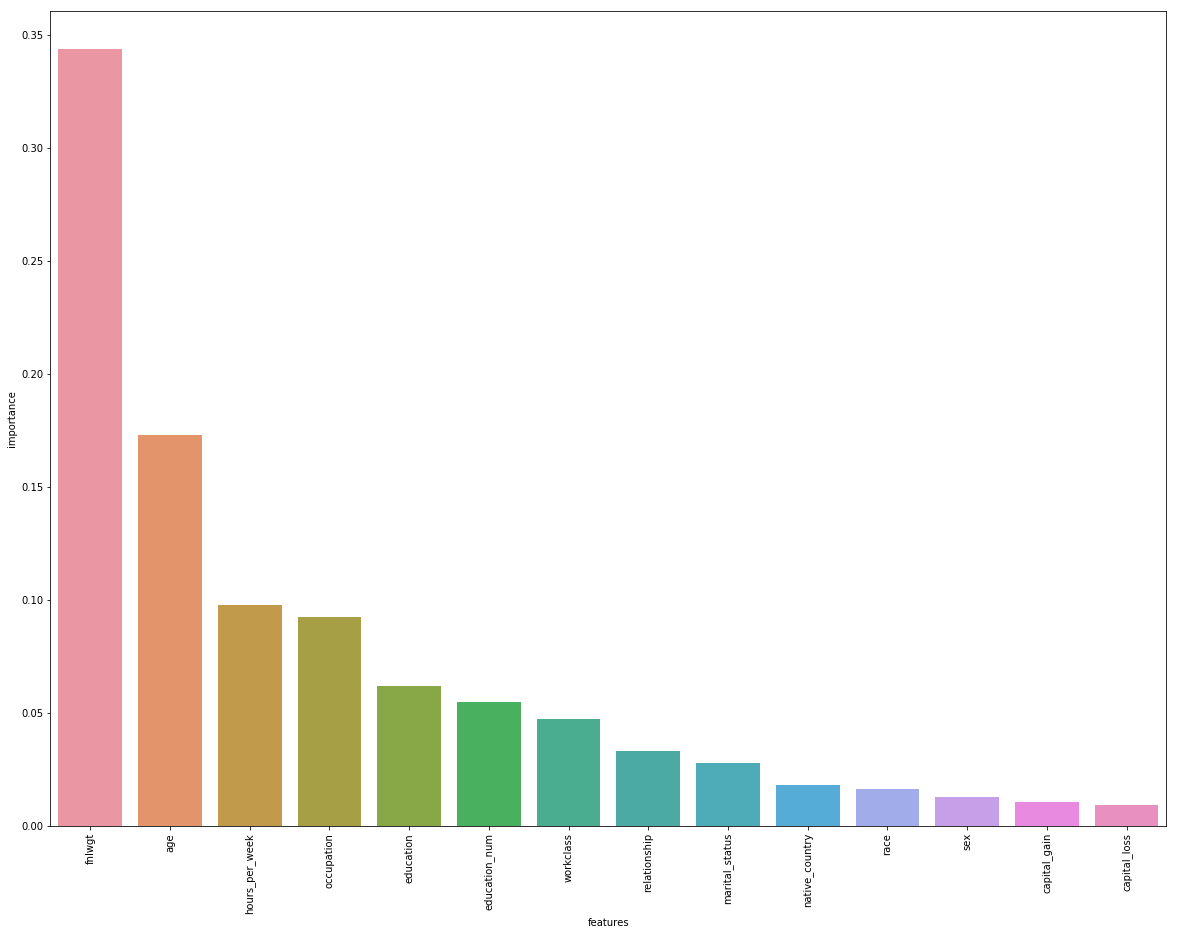

In [80]:
# Visualisation of feature importance
plt.figure(figsize=(20,15))
sns.barplot(importance.features, importance.importance)
plt.xticks(rotation=90)
plt.show()

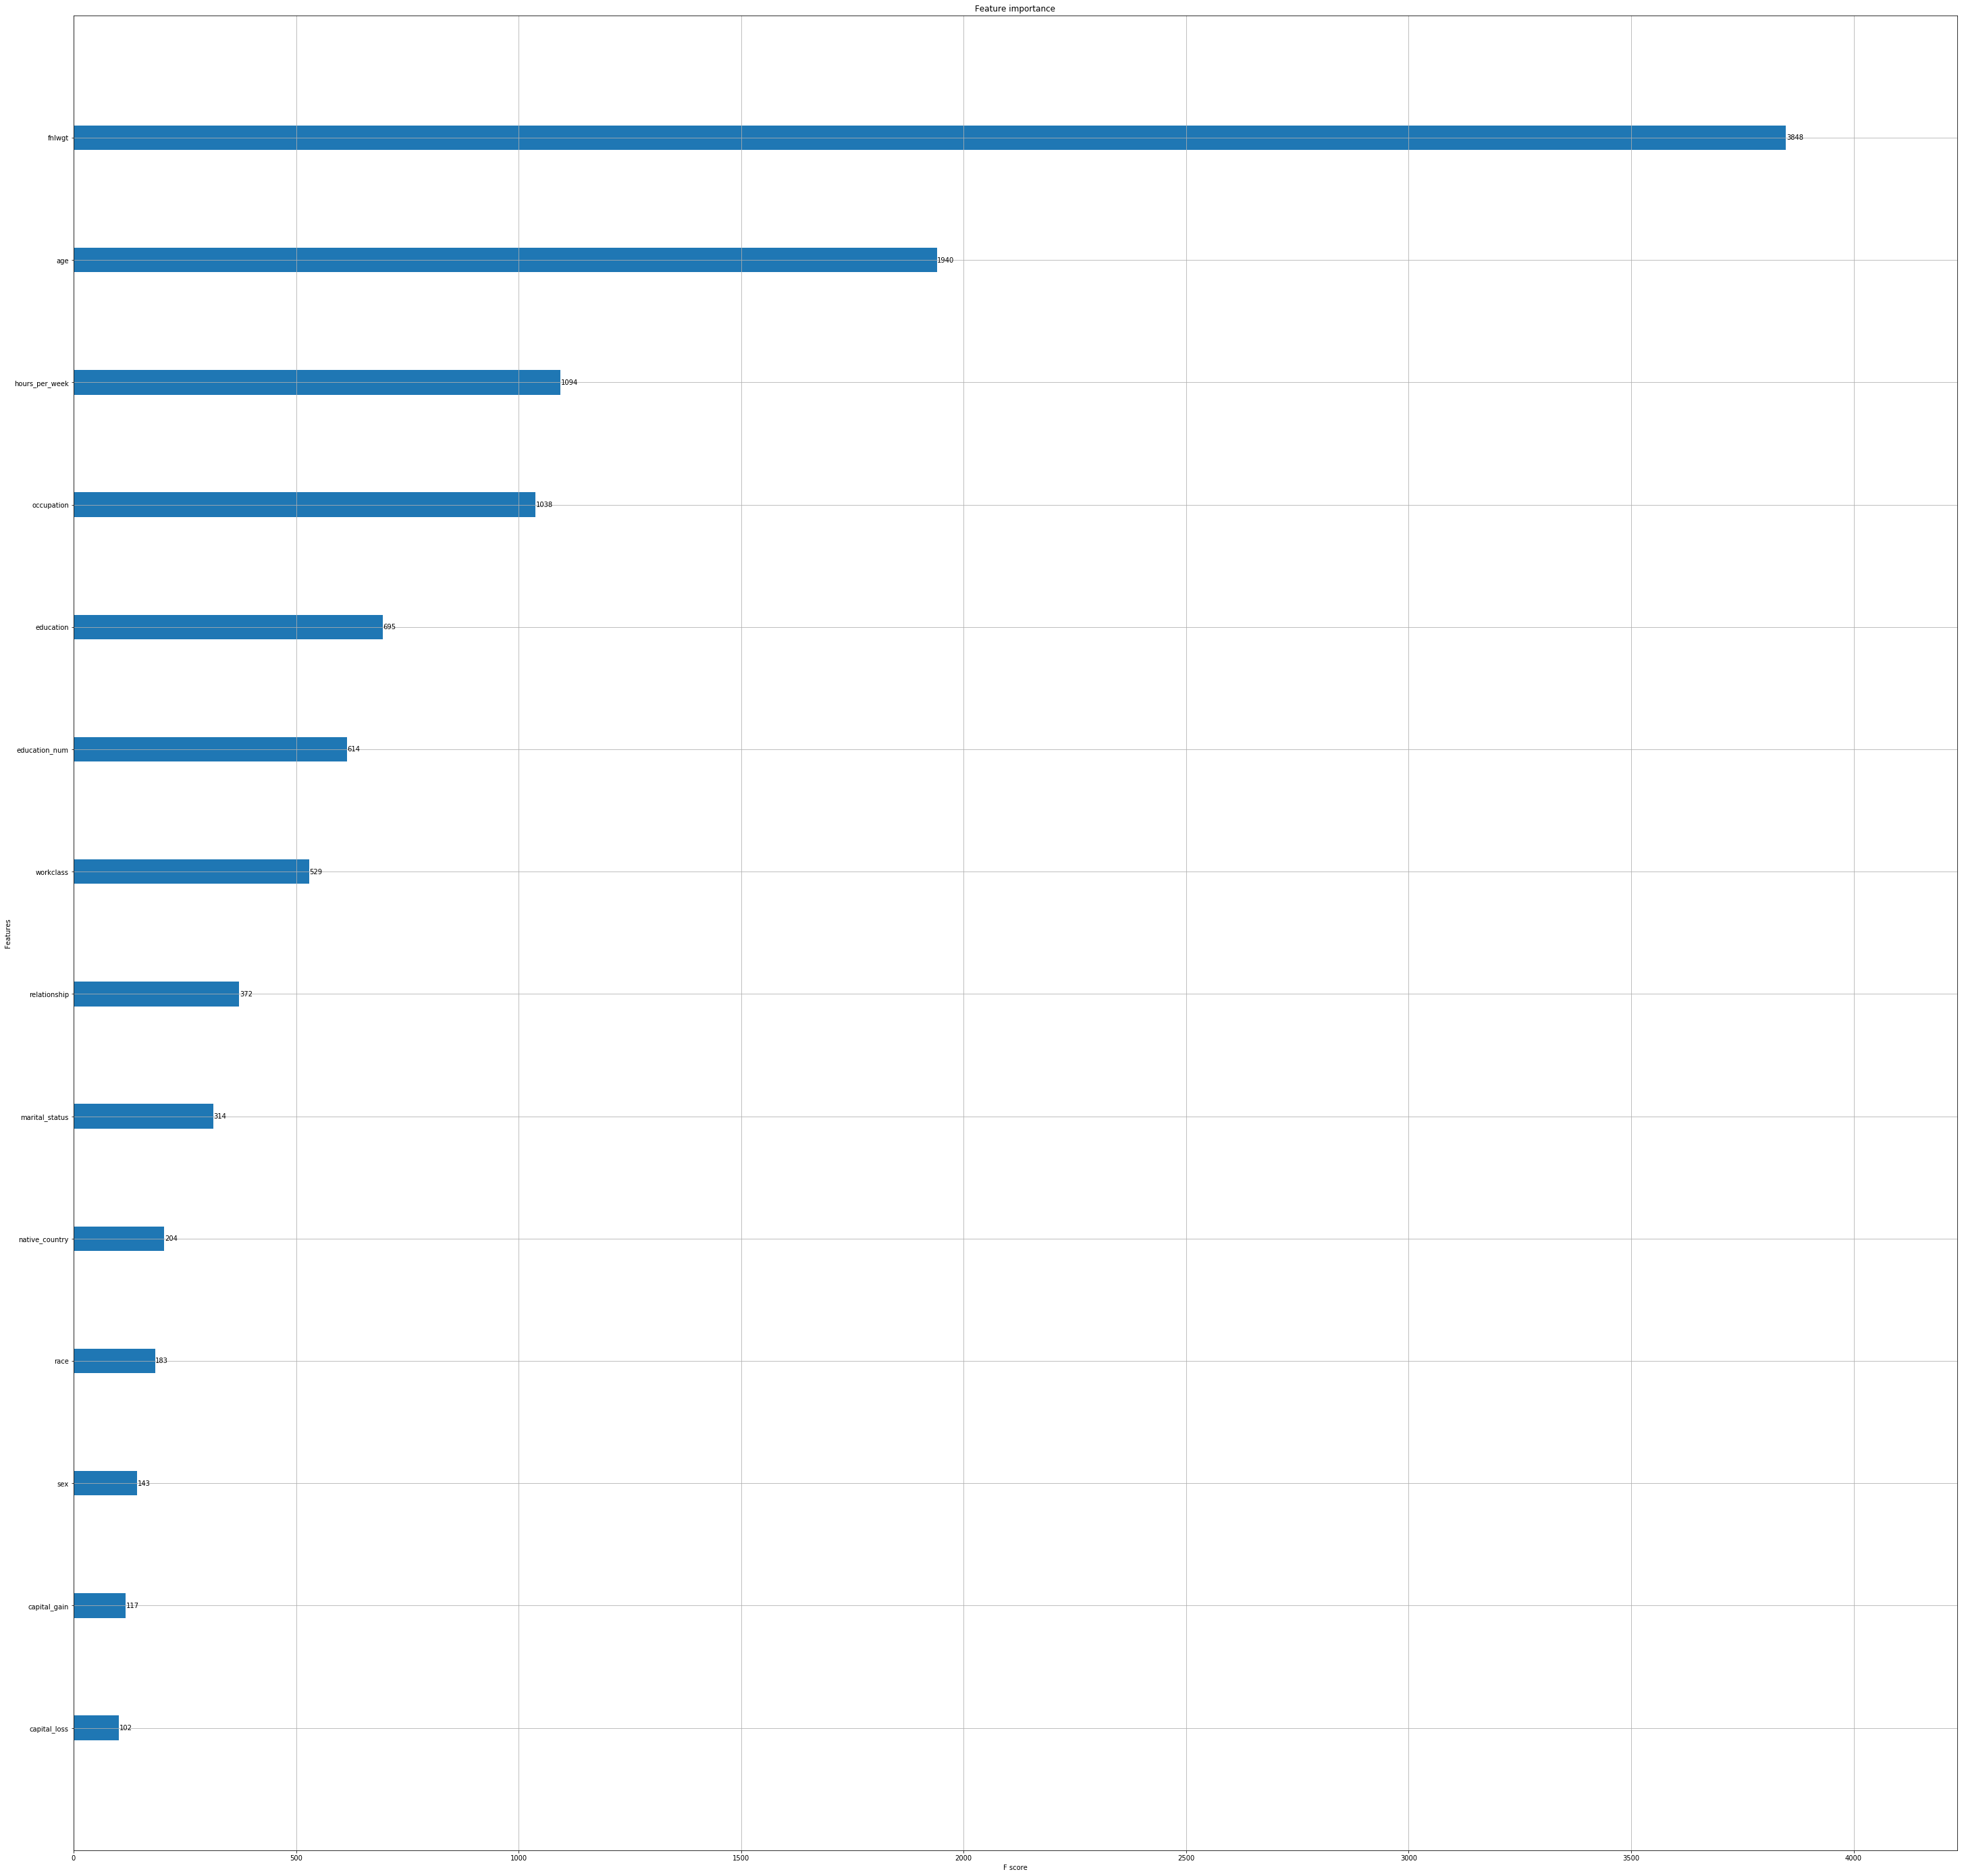

In [81]:
plot_importance(xgb_model)

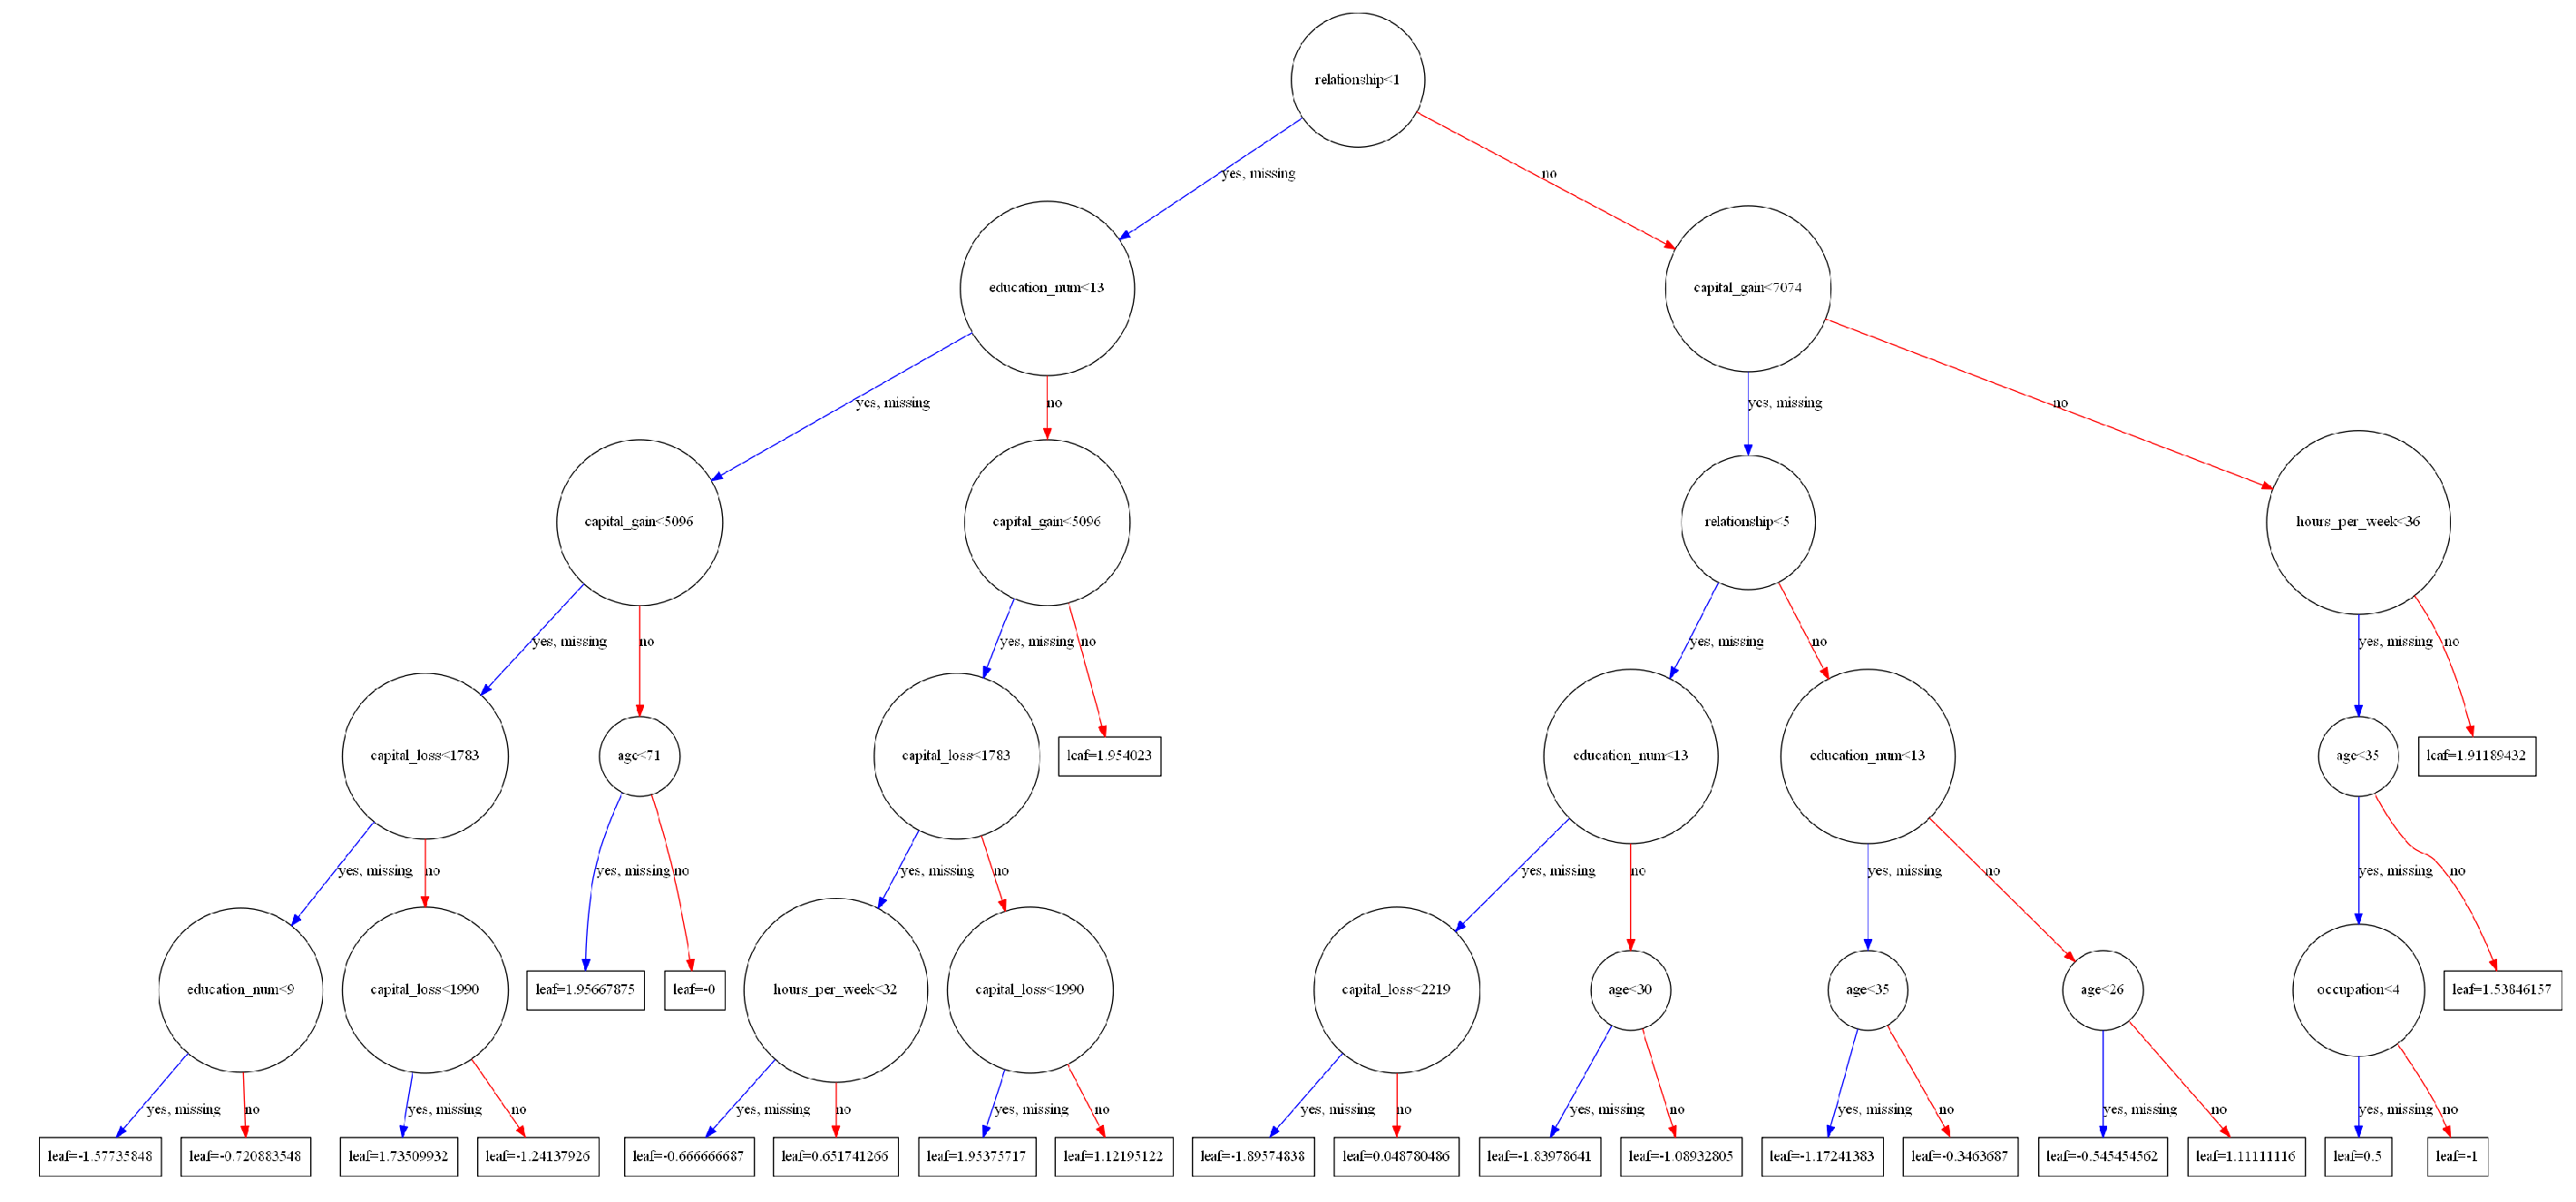

In [82]:
# Visulisation of single tree from xgboost model
plot_tree(xgb_model,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In [35]:
# XGboost Model evaluation using test set

In [83]:
# Predict probabilities and values on test dataset
y_pred_test=xgb_model.predict(X_test)
y_pred_prob_test=xgb_model.predict_proba(X_test)

# Confusion Matrix 
matrix_test = confusion_matrix(y_true=y_test , y_pred=y_pred_test)

# Classification Report 
report_test = classification_report(y_true=y_test , y_pred=y_pred_test)

print("Confusion Matrix for test set :\n",matrix)
print("\nClassification Report for test set :\n",report)

Confusion Matrix for test set :
 [[22308   325]
 [  423  7083]]

Classification Report for test set :
              precision    recall  f1-score   support

          0       0.98      0.99      0.98     22633
          1       0.96      0.94      0.95      7506

avg / total       0.98      0.98      0.98     30139



C:\Users\praka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [84]:
# Model acurracy score, Precision score , Recall score and F1-score
acc_score_test= accuracy_score(y_true=y_test , y_pred=y_pred_test)
prec_score_test=precision_score(y_true=y_test , y_pred=y_pred_test)
recl_score_test= recall_score(y_true=y_test, y_pred=y_pred_test)
#f1_score_test= f1_score(y_true= y_test, y_pred=y_pred_test)

print("Model Accuracy score :", acc_score_test )
print("Model Precision score :",prec_score_test)
print("Model Recall score :", recl_score_test)
#print("Model F-1 score :", f1_score_test )
#Feature Importance
importance = pd.DataFrame.from_dict({'features':X_test.columns, 'importance': xgb_model.feature_importances_})
importance=importance.sort_values(by='importance', ascending=False)
importance

Model Accuracy score : 0.8261042842909333
Model Precision score : 0.6721833227243794
Model Recall score : 0.5708108108108109


,features,importance
2,fnlwgt,0.343786
0,age,0.173323
12,hours_per_week,0.097740
6,occupation,0.092737
3,education,0.062092
4,education_num,0.054856
1,workclass,0.047262
7,relationship,0.033235
5,marital_status,0.028053
13,native_country,0.018226


* Observation 
* Baseline Accuracy for train and test dataset is approx 75%
* Model accuracy for test dataset 83%